<a href="https://colab.research.google.com/github/prismotta/Time-3/blob/main/PIBxDesembolsos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook desenvolvido pelo time 3 para tratar os dados que serão visualizados no dashboard

#Instalações e importações

In [156]:
!pip install unidecode

In [157]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
from unidecode import unidecode
from IPython.display import display
from scipy import stats

In [158]:
#Importando o google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
pd.options.display.float_format = '{:.2f}'.format 

#Extraindo as cidades das regiões de interesse (Triângulo Mineiro e Alto Paranaíba)

In [160]:
df_regi_MG = pd.read_excel('/content/drive/MyDrive/desafio bndes/maratona - sites e bases de dados utilizadas/regplan_lista_municipios_MG.xlsx')

In [161]:
df_regi_MG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo da regiao                853 non-null    int64 
 1   Nome da Regiao de Planejamento  853 non-null    object
 2   Municipio                       853 non-null    object
dtypes: int64(1), object(2)
memory usage: 20.1+ KB


In [162]:
display(df_regi_MG.head())

,codigo da regiao,Nome da Regiao de Planejamento,Municipio
0,1,Central,Abaeté
1,1,Central,Alfredo Vasconcelos
2,1,Central,Alvinópolis
3,1,Central,Alvorada de Minas
4,1,Central,Antônio Carlos


Mapa das regiões de Minas Gerais

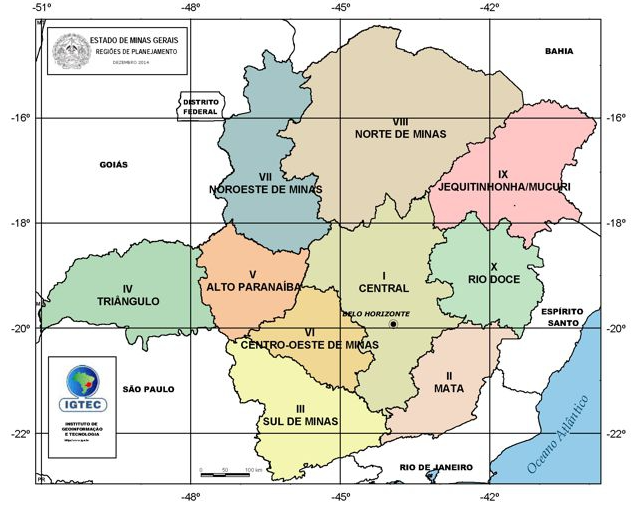


In [163]:
#tratando e uniformizando o nome dos municipios
RegiP_cidadesMG = df_regi_MG

cidades = RegiP_cidadesMG['Municipio']

M1=[]
r = re.compile(r'[^\D]*|[\/]*')

for i in cidades:
  aux1 = i.lower()
  aux2 = unidecode(aux1)
  aux3 = aux2.rstrip()
  M1.append(r.sub('', aux3))

RegiP_cidadesMG.insert(3,'cidade',M1)
RegiP_cidadesMG.head()

,codigo da regiao,Nome da Regiao de Planejamento,Municipio,cidade
0,1,Central,Abaeté,abaete
1,1,Central,Alfredo Vasconcelos,alfredo vasconcelos
2,1,Central,Alvinópolis,alvinopolis
3,1,Central,Alvorada de Minas,alvorada de minas
4,1,Central,Antônio Carlos,antonio carlos


Extraindo apenas as regiões do nosso interesse

In [164]:
df_regioes_TeAP = RegiP_cidadesMG[['codigo da regiao','Nome da Regiao de Planejamento','cidade']][(RegiP_cidadesMG["codigo da regiao"] == 4) | (RegiP_cidadesMG["codigo da regiao"] == 5)]
df_regioes_TeAP.tail()

,codigo da regiao,Nome da Regiao de Planejamento,cidade
516,5,Alto Paranaíba,santa rosa da serra
517,5,Alto Paranaíba,sao gotardo
518,5,Alto Paranaíba,serra do salitre
519,5,Alto Paranaíba,tapira
520,5,Alto Paranaíba,tiros


In [165]:
df_regioes_TeAP.head()

,codigo da regiao,Nome da Regiao de Planejamento,cidade
455,4,Triângulo,agua comprida
456,4,Triângulo,araguari
457,4,Triângulo,arapora
458,4,Triângulo,cachoeira dourada
459,4,Triângulo,campina verde


In [166]:
df_regioes_TeAP.shape

(66, 3)

In [167]:
df_regioes_TeAP[['codigo da regiao','Nome da Regiao de Planejamento','cidade']][df_regioes_TeAP["cidade"] == "itapajipe"]

,codigo da regiao,Nome da Regiao de Planejamento,cidade
475,4,Triângulo,itapajipe


In [168]:
#Corrigindo o nome da cidade Itapagipe no dataframe
df_regioes_TeAP["cidade"] = [j.replace("itapajipe","itapagipe") for j in  df_regioes_TeAP["cidade"]]

In [169]:
df_regioes_TeAP[['codigo da regiao','Nome da Regiao de Planejamento','cidade']][df_regioes_TeAP["cidade"] == "itapagipe"]

,codigo da regiao,Nome da Regiao de Planejamento,cidade
475,4,Triângulo,itapagipe


O Brasil é uma república federativa formada pela união de 26 estados federados, 5 568 municípios e do Distrito Federal.

Cidades de MG que tem nome o mesmo nome em outro estado 
* cachoeira dourada - 2
* canapolis - 2
* indianopolis - 2
* itapajipe  - não é com "j" é com "g"
* prata 2
* arapua - 2
* tapira - 2


#**Tratando os dados do PIB**
Encontradas bases de dados de 2002 até 2018
https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9088-produto-interno-bruto-dos-municipios.html?edicao=29720&t=downloads

In [170]:
df_PIB_02_09 = pd.read_excel('/content/drive/MyDrive/desafio bndes/maratona - sites e bases de dados utilizadas/PIB dos Municípios - base de dados 2002-2009.xls')

In [171]:
df_PIB_02_09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44501 entries, 0 to 44500
Data columns (total 40 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                             --------------  -----  
 0   Ano                                                                                                                                                44501 non-null  int64  
 1   Código da Grande Região                                                                                                                            44501 non-null  int64  
 2   Nome da Grande Região                                                                                                                              44501 non-null  object 
 3   Código

In [172]:
df_PIB_02_09.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)"
0,2002,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,do Entorno,1102,Ji-Paraná,do Entorno,nan,NaN,NaN,nan,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,27013.22,9376.87,24651.11,42700.52,103741.73,7549.27,111290.99,4047.83
1,2002,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,Leste Rondoniense,11003,Ariquemes,110002,Ariquemes,Polo,1101,Porto Velho,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,28590.18,99922.94,161851.55,116562.18,406926.84,42665.97,449592.82,5667.37
2,2002,1,Norte,11,RO,Rondônia,1100031,Cabixi,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110006,Vilhena,do Entorno,1102,Ji-Paraná,do Entorno,nan,NaN,NaN,nan,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,10883.80,1961.91,5128.88,11925.00,29899.58,1867.93,31767.52,4246.99
3,2002,1,Norte,11,RO,Rondônia,1100049,Cacoal,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,Polo,1102,Ji-Paraná,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,5105,Região Rural do Centro Sub-regional de Vilhena...,Região Rural de Centro Sub-regional,Sim,Não,Não,32810.38,98292.76,175748.70,117968.30,424820.15,49622.95,474443.10,6353.27
4,2002,1,Norte,11,RO,Rondônia,1100056,Cerejeiras,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110006,Vilhena,do Entorno,1102,Ji-Paraná,do Entorno,nan,NaN,NaN,nan,NaN,Centro de Zona B,Centro de Zona,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,11283.79,6651.48,25306.01,27731.37,70972.64,8200.97,79173.61,4442.47


In [173]:
#tratando e uniformizando o nome dos municipios
municipio4 = df_PIB_02_09['Nome do Município']
r = re.compile(r'[^\D]*|[\/]*')
M4=[]
for i in municipio4:
  aux = str(i) 
  aux1 = aux.lower()
  aux2 = unidecode(aux1)
  aux3 = aux2.rstrip()
  M4.append(r.sub('', aux3))

df_PIB_02_09.insert(40,'cidade',M4 )

In [174]:
df_PIB_02_09[df_PIB_02_09["cidade"] == "ituiutaba"]

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",cidade
2627,2002,3,Sudeste,31,MG,Minas Gerais,3134202,Ituiutaba,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31017,Ituiutaba,310060,Ituiutaba,Polo,3111,Uberlândia,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,29501.38,176367.55,240956.28,94238.72,541063.92,71054.20,612118.12,6772.19,ituiutaba
8187,2003,3,Sudeste,31,MG,Minas Gerais,3134202,Ituiutaba,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31017,Ituiutaba,310060,Ituiutaba,Polo,3111,Uberlândia,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,50078.89,231882.25,291109.28,101100.33,674170.74,79064.52,753235.26,8286.69,ituiutaba
13747,2004,3,Sudeste,31,MG,Minas Gerais,3134202,Ituiutaba,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31017,Ituiutaba,310060,Ituiutaba,Polo,3111,Uberlândia,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,64506.33,168613.94,387694.26,110092.53,730907.06,87568.06,818475.12,8954.18,ituiutaba
19308,2005,3,Sudeste,31,MG,Minas Gerais,3134202,Ituiutaba,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31017,Ituiutaba,310060,Ituiutaba,Polo,3111,Uberlândia,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,59005.42,116556.60,407779.96,126003.23,709345.21,95570.38,804915.59,8756.79,ituiutaba
24872,2006,3,Sudeste,31,MG,Minas Gerais,3134202,Ituiutaba,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31017,Ituiutaba,310060,Ituiutaba,Polo,3111,Uberlândia,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,65193.06,160020.26,452895.93,135830.46,813939.71,106038.73,919978.44,9953.57,ituiutaba
30436,2007,3,Sudeste,31,MG,Minas Gerais,3134202,Ituiutaba,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31017,Ituiutaba,310060,Ituiutaba,Polo,3111,Uberlândia,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,61283.55,165063.64,534700.56,155875.93,916923.68,130409.54,1047333.21,1

Mesclando a tabela do PIB de 2002 a 2009 com a das regiões, assim pegando só as duas regiões do nosso interesse

In [175]:
df_PIB_02_09_TMeAP = pd.merge(df_regioes_TeAP, df_PIB_02_09, on = 'cidade')

In [176]:
df_PIB_02_09_TMeAP.shape

(576, 43)

Triângulo Mineiro + Alto Paranaíba = 66 municípios. De 2002 a 2009 = 8 anos. 66 * 8 = 528

In [177]:
df_PIB_02_09_TMeAP.head()

,codigo da regiao,Nome da Regiao de Planejamento,cidade,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)"
0,4,Triângulo,agua comprida,2002,3,Sudeste,31,MG,Minas Gerais,3100708,Água Comprida,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31022,Uberaba,310055,Uberaba,do Entorno,3110,Uberaba,do Entorno,nan,NaN,NaN,nan,NaN,Centro Local,Centro Local,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,12850.89,1573.57,6518.30,4210.24,25153.00,1158.26,26311.26,12102.69
1,4,Triângulo,agua comprida,2003,3,Sudeste,31,MG,Minas Gerais,3100708,Água Comprida,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31022,Uberaba,310055,Uberaba,do Entorno,3110,Uberaba,do Entorno,nan,NaN,NaN,nan,NaN,Centro Local,Centro Local,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,21409.24,1878.77,9229.34,4671.23,37188.60,1769.45,38958.04,17660.04
2,4,Triângulo,agua comprida,2004,3,Sudeste,31,MG,Minas Gerais,3100708,Água Comprida,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31022,Uberaba,310055,Uberaba,do Entorno,3110,Uberaba,do Entorno,nan,NaN,NaN,nan,NaN,Centro Local,Centro Local,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,28648.23,1791.01,10930.34,5239.69,46609.27,2204.35,48813.61,21811.27
3,4,Triângulo,agua comprida,2005,3,Sudeste,31,MG,Minas Gerais,3100708,Água Comprida,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31022,Uberaba,310055,Uberaba,do Entorno,3110,Uberaba,do Entorno,nan,NaN,NaN,nan,NaN,Centro Local,Centro Local,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,22095.99,2018.27,9605.34,5943.57,39663.17,2122.41,41785.58,18407.74
4,4,Triângulo,agua comprida,2006,3,Sudeste,31,MG,Minas Gerais,3100708,Água Comprida,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31022,Uberaba,310055,Uberaba,do Entorno,3110,Uberaba,do Entorno,nan,NaN,NaN,nan,NaN,Centro Local,Centro Local,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,28364.46,2030.26,10517.55,6210.58,47122.84,1964.88,49087.72,21323.95


In [178]:
#Separando só as cidades de Minas Gerais
df_PIB_02_09_TMeAP = df_PIB_02_09_TMeAP[df_PIB_02_09_TMeAP["Sigla da Unidade da Federação"] == "MG"]

In [179]:
df_PIB_02_09_TMeAP.shape

(528, 43)

Base de dados do PIB de 2010 - 2018

In [180]:
df_PIB_10_18 = pd.read_excel('/content/drive/MyDrive/desafio bndes/maratona - sites e bases de dados utilizadas/PIB dos Municípios - base de dados 2010-2018.xls')

In [181]:
df_PIB_10_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50115 entries, 0 to 50114
Data columns (total 43 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                             --------------  -----  
 0   Ano                                                                                                                                                50115 non-null  int64  
 1   Código da Grande Região                                                                                                                            50115 non-null  int64  
 2   Nome da Grande Região                                                                                                                              50115 non-null  object 
 3   Código

In [182]:
df_PIB_10_18.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
0,2010,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,do Entorno,1102,Ji-Paraná,do Entorno,nan,NaN,NaN,nan,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,69260.39,16118.53,62496.18,93244.66,241119.77,20957.11,262076.88,10731.18,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
1,2010,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,Leste Rondoniense,11003,Ariquemes,110002,Ariquemes,Polo,1101,Porto Velho,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,73711.64,287138.59,494946.27,343867.73,1199664.23,165029.55,1364693.78,15103.86,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
2,2010,1,Norte,11,RO,Rondônia,1100031,Cabixi,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110006,Vilhena,do Entorno,1102,Ji-Paraná,do Entorno,nan,NaN,NaN,nan,NaN,Centro Local,Centro Local,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,24300.82,3252.51,12677.21,25170.24,65400.77,4210.34,69611.11,11033.62,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
3,2010,1,Norte,11,RO,Rondônia,1100049,Cacoal,NaN,1102,Leste Rondoniense,11006,Cacoal,110005,Cacoal,Polo,1102,Ji-Paraná,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,5105,Região Rural do Centro Sub-regional de Vilhena...,Região Rural de Centro Sub-regional,Sim,Não,Não,95259.20,182051.54,465447.33,298454.31,1041212.37,145281.72,1186494.09,15095.15,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
4,2010,1,Norte,11,RO,Rondônia,1100056,Cerejeiras,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110006,Vilhena,do Entorno,1102,Ji-Paraná,do Entorno,nan,NaN,NaN,nan,NaN,Centro de Zona B,Centro de Zona,1101,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,28976.42,19734.48,80724.99,63018.27,192454.16,29567.03,22

In [183]:
#tratando e uniformizando o nome dos municipios
municipio5 = df_PIB_10_18['Nome do Município']
r = re.compile(r'[^\D]*|[\/]*')
M5=[]
for i in municipio5:
  aux = str(i) 
  aux1 = aux.lower()
  aux2 = unidecode(aux1)
  aux3 = aux2.rstrip()
  M5.append(r.sub('', aux3))

df_PIB_10_18.insert(43,'cidade',M5 )

In [184]:
df_PIB_10_18[df_PIB_10_18['cidade'] == 'uberlandia']

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto,cidade
3066,2010,3,Sudeste,31,MG,Minas Gerais,3170206,Uberlândia,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31018,Uberlândia,310059,Uberlândia,Polo,3111,Uberlândia,Polo,3170206.00,Uberlândia,Média concentração urbana,nan,NaN,Núcleo de Capital Regional B,Capital Regional,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,352933.01,5751280.35,7658572.80,1456652.71,15219438.87,3731138.63,18950577.50,31569.30,Demais serviços,Indústrias de transformação,Comércio e reparação de veículos automotores e...,uberlandia
8631,2011,3,Sudeste,31,MG,Minas Gerais,3170206,Uberlândia,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31018,Uberlândia,310059,Uberlândia,Polo,3111,Uberlândia,Polo,3170206.00,Uberlândia,Média concentração urbana,nan,NaN,Núcleo de Capital Regional B,Capital Regional,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,361440.57,5217746.55,8411705.39,1627757.83,15618650.35,3934559.70,19553210.05,31954.70,Demais serviços,Indústrias de transformação,Comércio e reparação de veículos automotores e...,uberlandia
14196,2012,3,Sudeste,31,MG,Minas Gerais,3170206,Uberlândia,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31018,Uberlândia,310059,Uberlândia,Polo,3111,Uberlândia,Polo,3170206.00,Uberlândia,Média concentração urbana,nan,NaN,Núcleo de Capital Regional B,Capital Regional,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,397821.25,5805067.07,10180958.77,1825869.78,18209716.87,4627560.87,22837277.74,36861.91,Demais serviços,Indústrias de transformação,Comércio e reparação de veículos automotores e...,uberlandia
19762,2013,3,Sudeste,31,MG,Minas Gerais,3170206,Uberlândia,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31018,Uberlândia,310059,Uberlândia,Polo,3111,Uberlândia,Polo,3170206.00,Uberlândia,Média concentração urbana,nan,NaN,Núcleo de Capital Regional B,Capital Regional,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,439100.32,6300613.86,11541624.06,2085013.31,20366351.56,5352234.23,25718585.78,39770.62,Demais serviços,Indústrias de transformação,Comércio e reparação de veículos automotores e...,uberlandia
25332,2014,3,Sudeste,31,MG,Minas Gerais,3170206,Uberlândia,NaN,3105,Triân

Mesclando a tabela do PIB de 2010 a 2018 com a das regiões, assim pegando só as duas regiões do nosso interesse

In [185]:
df_PIB_10_18_TMeAP = pd.merge(df_regioes_TeAP, df_PIB_10_18, on = 'cidade')

In [186]:
df_PIB_10_18_TMeAP.shape

(648, 46)

Triângulo Mineiro + Alto Paranaíba = 66 municípios. De 2010 a 2018 = 9 anos. 66 * 9 = 594

In [187]:
#Separando só as cidades de Minas Gerais
df_PIB_10_18_TMeAP = df_PIB_10_18_TMeAP[df_PIB_10_18_TMeAP["Sigla da Unidade da Federação"] == "MG"]

In [188]:
df_PIB_10_18_TMeAP.shape

(594, 46)

In [189]:
df_PIB_10_18_TMeAP[df_PIB_10_18_TMeAP['cidade'] == 'ituiutaba']

,codigo da regiao,Nome da Regiao de Planejamento,cidade,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
216,4,Triângulo,ituiutaba,2010,3,Sudeste,31,MG,Minas Gerais,3134202,Ituiutaba,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31017,Ituiutaba,310060,Ituiutaba,Polo,3111,Uberlândia,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,80191.57,271851.93,901451.95,216896.47,1470391.91,218754.63,1689146.54,17385.38,Demais serviços,Comércio e reparação de veículos automotores e...,"Administração, defesa, educação e saúde públic..."
217,4,Triângulo,ituiutaba,2011,3,Sudeste,31,MG,Minas Gerais,3134202,Ituiutaba,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31017,Ituiutaba,310060,Ituiutaba,Polo,3111,Uberlândia,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,135784.99,417622.08,908058.16,244034.94,1705500.18,223590.43,1929090.61,19726.47,Demais serviços,Indústrias de transformação,Comércio e reparação de veículos automotores e...
218,4,Triângulo,ituiutaba,2012,3,Sudeste,31,MG,Minas Gerais,3134202,Ituiutaba,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31017,Ituiutaba,310060,Ituiutaba,Polo,3111,Uberlândia,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,97794.84,466179.81,1002533.01,270118.26,1836625.92,244814.26,2081440.18,21154.57,Demais serviços,Indústrias de transformação,Comércio e reparação de veículos automotores e...
219,4,Triângulo,ituiutaba,2013,3,Sudeste,31,MG,Minas Gerais,3134202,Ituiutaba,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31017,Ituiutaba,310060,Ituiutaba,Polo,3111,Uberlândia,do Entorno,nan,NaN,NaN,nan,NaN,Centro Subregional B,Centro Subregional,3106,Região Rural da Capital Regional de Uberlândia,Região Rural de Capital Regional,Não,Não,Não,113679.28,568122.43,1253280.80,304009.88,2239092.40,309786.78,2548879.18,24984.11,Demais serviços,Indústrias de transformação,Comércio e reparação de veículos automotores e...
220,4,Triângulo,ituiutaba,2014,3,Sudeste,31,MG,Minas Gerais,3134202,Ituiutaba,NaN,3105,Triângulo Mineiro/Alto Paranaíba,31017,Ituiutaba,310060,It

#Desembolsos Mensais BNDES

In [190]:
df_desembolsos_mensais = pd.read_csv('/content/drive/MyDrive/desafio bndes/maratona - sites e bases de dados utilizadas/desembolsos-mensais.csv', sep = ';', encoding = 'UTF-8')

In [191]:
df_desembolsos_mensais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244804 entries, 0 to 3244803
Data columns (total 16 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   ano                     int64 
 1   mes                     int64 
 2   forma_de_apoio          object
 3   produto                 object
 4   instrumento_financeiro  object
 5   inovacao                object
 6   porte_de_empresa        object
 7   regiao                  object
 8   uf                      object
 9   municipio               object
 10  municipio_codigo        int64 
 11  setor_cnae              object
 12  subsetor_cnae_agrupado  object
 13  setor_bndes             object
 14  subsetor_bndes          object
 15  desembolsos_reais       object
dtypes: int64(3), object(13)
memory usage: 396.1+ MB


In [192]:
df_desembolsos_mensais[df_desembolsos_mensais['municipio'] == 'ITUIUTABA']

,ano,mes,forma_de_apoio,produto,instrumento_financeiro,inovacao,porte_de_empresa,regiao,uf,municipio,municipio_codigo,setor_cnae,subsetor_cnae_agrupado,setor_bndes,subsetor_bndes,desembolsos_reais
21028,2014,7,INDIRETA,BNDES FINAME,PSI - BK - Ônibus e Caminhão,NÃO,MÉDIA,SUDESTE,MINAS GERAIS,ITUIUTABA,3134202,COMÉRCIO E SERVIÇOS,TRANSPORTE TERRESTRE,INFRAESTRUTURA,TRANSPORTE RODOVIÁRIO,"9610843,5"
45628,2018,11,INDIRETA,BNDES AUTOMÁTICO,BNDES GIRO,NÃO,MÉDIA,SUDESTE,MINAS GERAIS,ITUIUTABA,3134202,INDÚSTRIA DE TRANSFORMAÇÃO,PRODUTOS ALIMENTÍCIOS,INDUSTRIA,ALIMENTO E BEBIDA,"4000000,0"
48586,2006,12,INDIRETA,BNDES FINAME,MODERMAQ,NÃO,GRANDE,SUDESTE,MINAS GERAIS,ITUIUTABA,3134202,INDÚSTRIA DE TRANSFORMAÇÃO,PRODUTOS ALIMENTÍCIOS,INDUSTRIA,ALIMENTO E BEBIDA,"3735639,9"
60297,2015,6,INDIRETA,BNDES AUTOMÁTICO,PROGRAMA ABC,NÃO,PEQUENA,SUDESTE,MINAS GERAIS,ITUIUTABA,3134202,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,"3000000,0"
64315,2016,4,INDIRETA,BNDES AUTOMÁTICO,PRONAMP INVESTIMENTO,NÃO,MICRO,SUDESTE,MINAS GERAIS,ITUIUTABA,3134202,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,"2805000,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235933,2013,6,INDIRETA,CARTÃO BNDES,CARTÃO BNDES,NÃO,MICRO,SUDESTE,MINAS GERAIS,ITUIUTABA,3134202,COMÉRCIO E SERVIÇOS,CONSTRUÇÃO,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,"533,95"
3236166,2008,12,INDIRETA,CARTÃO BNDES,CARTÃO BNDES,NÃO,MICRO,SUDESTE,MINAS GERAIS,ITUIUTABA,3134202,COMÉRCIO E SERVIÇOS,COMÉRCIO,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,"526,22"
3237987,2016,7,INDIRETA,CARTÃO BNDES,CARTÃO BNDES,NÃO,MICRO,SUDESTE,MINAS GERAIS,ITUIUTABA,3134202,COMÉRCIO E SERVIÇOS,"ATIV IMOBIL, PROFISSIONAL E ADM",COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,"458,82"
3242869,2017,12,INDIRETA,CARTÃO BNDES,CARTÃO BNDES,NÃO,PEQUENA,SUDESTE,MINAS GERAIS,ITUIUTABA,3134202,INDÚSTRIA DE TRANSFORMAÇÃO,PRODUTOS ALIMENTÍCIOS,INDUSTRIA,ALIMENTO E BEBIDA,"223,89"


In [193]:
#tratando e uniformizando o nome dos municipios
municipio5 = df_desembolsos_mensais['municipio']
r = re.compile(r'[^\D]*|[\/]*')
M5=[]
for i in municipio5: 
  aux1 = i.lower()
  aux2 = unidecode(aux1)
  aux3 = aux2.rstrip()
  M5.append(r.sub('', aux3))

df_desembolsos_mensais.insert(16,'cidade',M5 )

In [194]:
df_desembolsos_mensais

,ano,mes,forma_de_apoio,produto,instrumento_financeiro,inovacao,porte_de_empresa,regiao,uf,municipio,municipio_codigo,setor_cnae,subsetor_cnae_agrupado,setor_bndes,subsetor_bndes,desembolsos_reais,cidade
0,2010,9,DIRETA,BNDES MERCADO DE CAPITAIS,MERCADO DE CAPITAIS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,RIO DE JANEIRO,3304557,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,"24753538073,6",rio de janeiro
1,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,NORDESTE,PERNAMBUCO,IPOJUCA,2607208,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,"9889997969,99",ipojuca
2,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,DIVERSOS,9999998,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,"9409998497,06",diversos
3,2012,12,DIRETA,BNDES FINEM,PROINVESTE,NÃO,GRANDE,CENTRO OESTE,DISTRITO FEDERAL,DIVERSOS,9999998,COMÉRCIO E SERVIÇOS,ADMINISTRAÇÃO PÚBLICA,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,"7271078745,3",diversos
4,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,DIVERSOS,9999998,COMÉRCIO E SERVIÇOS,TRANSPORTE TERRESTRE,INFRAESTRUTURA,OUTROS TRANSPORTES,"5699997243,57",diversos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244799,2014,3,INDIRETA,BNDES FINAME,PSI - BK - Ônibus e Caminhão,NÃO,MÉDIA,SUDESTE,SAO PAULO,SAO JOAQUIM DA BARRA,3549409,INDÚSTRIA DE TRANSFORMAÇÃO,MÁQUINAS E EQUIPAMENTOS,INDUSTRIA,MECÂNICA,"1,0",sao joaquim da barra
3244800,2014,12,DIRETA,BNDES MERCADO DE CAPITAIS,MERCADO DE CAPITAIS,NÃO,GRANDE,SUL,RIO GRANDE DO SUL,PORTO ALEGRE,4314902,COMÉRCIO E SERVIÇOS,TELECOMUNICAÇÕES,INFRAESTRUTURA,TELECOMUNICAÇÕES,"1,0",porto alegre
3244801,2020,10,INDIRETA,BNDES AUTOMÁTICO,PRONAMP INVESTIMENTO,NÃO,MICRO,SUL,PARANA,TIJUCAS DO SUL,4127601,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,"0,8",tijucas do sul
3244802,2016,1,INDIRETA,BNDES FINAME,PSI - BK - Demais Itens,NÃO,MÉDIA,SUL,PARANA,MANGUEIRINHA,4114401,COMÉRCIO E SERVIÇOS,COMÉRCIO,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,"0,12",mangueirinha


Substituindo o separador decimal da coluna "desembolsos_reais"

In [195]:
df_desembolsos_mensais['desembolsos_reais'] = [x.replace(",", ".") for x in df_desembolsos_mensais['desembolsos_reais']]
df_desembolsos_mensais['desembolsos_reais'] = df_desembolsos_mensais['desembolsos_reais'].astype(float)

In [196]:
df_desembolsos_mensais.head(1)

,ano,mes,forma_de_apoio,produto,instrumento_financeiro,inovacao,porte_de_empresa,regiao,uf,municipio,municipio_codigo,setor_cnae,subsetor_cnae_agrupado,setor_bndes,subsetor_bndes,desembolsos_reais,cidade
0,2010,9,DIRETA,BNDES MERCADO DE CAPITAIS,MERCADO DE CAPITAIS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,RIO DE JANEIRO,3304557,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,24753538073.60,rio de janeiro


In [197]:
df_desembolsos_mensais['ano'].value_counts()

2013    340581
2014    327780
2012    304789
2015    277068
2011    269847
2010    221575
2016    199073
2017    155616
2009    140995
2018    131920
2019    118929
2020    111696
2008     95325
2007     86112
2006     59562
2005     56067
2003     51524
2002     50074
2001     44853
2000     37795
2004     35241
1995     29367
1998     27966
1999     25399
1997     24426
1996     21224
Name: ano, dtype: int64

In [198]:
df_desembolsos_mensais['uf'].value_counts()

SAO PAULO               669423
RIO GRANDE DO SUL       434850
PARANA                  400266
MINAS GERAIS            396461
SANTA CATARINA          308075
BAHIA                   135430
GOIAS                   117961
MATO GROSSO             109750
RIO DE JANEIRO          100432
ESPIRITO SANTO           78478
PERNAMBUCO               62532
MATO GROSSO DO SUL       61290
CEARA                    58493
PARA                     51168
MARANHAO                 42944
RONDONIA                 33847
TOCANTINS                29529
PARAIBA                  27417
RIO GRANDE DO NORTE      25975
PIAUI                    22451
AMAZONAS                 17441
ALAGOAS                  16984
SERGIPE                  15766
DISTRITO FEDERAL         12301
ACRE                      7163
AMAPA                     4891
RORAIMA                   3486
Name: uf, dtype: int64

Mesclando só as duas regiões de interesse 

In [199]:
df_desembolsos_mensais_TeAP = pd.merge(df_regioes_TeAP, df_desembolsos_mensais, on = 'cidade')

In [200]:
df_desembolsos_mensais_TeAP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67357 entries, 0 to 67356
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   codigo da regiao                67357 non-null  int64  
 1   Nome da Regiao de Planejamento  67357 non-null  object 
 2   cidade                          67357 non-null  object 
 3   ano                             67357 non-null  int64  
 4   mes                             67357 non-null  int64  
 5   forma_de_apoio                  67357 non-null  object 
 6   produto                         67357 non-null  object 
 7   instrumento_financeiro          62647 non-null  object 
 8   inovacao                        62647 non-null  object 
 9   porte_de_empresa                67357 non-null  object 
 10  regiao                          67357 non-null  object 
 11  uf                              67357 non-null  object 
 12  municipio                       

In [201]:
#tratando e uniformizando o nome dos estados
uf = df_desembolsos_mensais_TeAP['uf']
r = re.compile(r'[^\D]*|[\/]*')
u=[]
for i in uf: 
  aux1 = i.lower()
  aux2 = unidecode(aux1)
  aux3 = aux2.rstrip()
  u.append(r.sub('', aux3))

df_desembolsos_mensais_TeAP.insert(19,'unidade_federativa',u )

In [202]:
df_desembolsos_mensais_TeAP

,codigo da regiao,Nome da Regiao de Planejamento,cidade,ano,mes,forma_de_apoio,produto,instrumento_financeiro,inovacao,porte_de_empresa,regiao,uf,municipio,municipio_codigo,setor_cnae,subsetor_cnae_agrupado,setor_bndes,subsetor_bndes,desembolsos_reais,unidade_federativa
0,4,Triângulo,agua comprida,2007,7,INDIRETA,BNDES AUTOMÁTICO,"CAPACIDADE PRODUTIVA NA INDÚSTRIA,AGRICULTURA,...",NÃO,MICRO,SUDESTE,MINAS GERAIS,AGUA COMPRIDA,3100708,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,1807089.10,minas gerais
1,4,Triângulo,agua comprida,2014,2,INDIRETA,BNDES FINAME,PSI - BK - Rural,NÃO,PEQUENA,SUDESTE,MINAS GERAIS,AGUA COMPRIDA,3100708,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,1394865.00,minas gerais
2,4,Triângulo,agua comprida,2014,9,INDIRETA,BNDES FINAME,PSI - BK - Rural,NÃO,MICRO,SUDESTE,MINAS GERAIS,AGUA COMPRIDA,3100708,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,1167400.00,minas gerais
3,4,Triângulo,agua comprida,2020,11,INDIRETA,BNDES FINAME,MODERFROTA,NÃO,MÉDIA,SUDESTE,MINAS GERAIS,AGUA COMPRIDA,3100708,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,1054000.00,minas gerais
4,4,Triângulo,agua comprida,2020,11,INDIRETA,BNDES FINAME,MODERFROTA,NÃO,PEQUENA,SUDESTE,MINAS GERAIS,AGUA COMPRIDA,3100708,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,1016855.00,minas gerais
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67352,5,Alto Paranaíba,tiros,2011,10,INDIRETA,CARTÃO BNDES,CARTÃO BNDES,NÃO,MICRO,SUDESTE,MINAS GERAIS,TIROS,3168903,COMÉRCIO E SERVIÇOS,COMÉRCIO,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,3600.13,minas gerais
67353,5,Alto Paranaíba,tiros,2012,11,INDIRETA,CARTÃO BNDES,CARTÃO BNDES,NÃO,MICRO,SUDESTE,MINAS GERAIS,TIROS,3168903,COMÉRCIO E SERVIÇOS,COMÉRCIO,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,3433.86,minas gerais
67354,5,Alto Paranaíba,tiros,2013,3,INDIRETA,CARTÃO BNDES,CARTÃO BNDES,NÃO,MICRO,SUDESTE,MINAS GERAIS,TIROS,3168903,COMÉRCIO E SERVIÇOS,COMÉRCIO,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,2671.49,minas gerais
67355,5,Alto Paranaíba,tiros,2013,12,INDIRETA,CARTÃO BNDES,CARTÃO BNDES,NÃO,MICRO,SUDESTE,MINAS GERAIS,TIROS,3168903,COMÉRCIO E SERVIÇOS,COMÉRCIO,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,2671.06,minas gerais


In [203]:
df_desembolsos_mensais_TeAP['unidade_federativa'].value_counts()

minas gerais    65945
parana           1089
goias             212
bahia              81
paraiba            30
Name: unidade_federativa, dtype: int64

Tratando a questão das cidades com nomes iguais, mas em diferentes estados

In [204]:
df_desembolsos_mensais_TeAP = df_desembolsos_mensais_TeAP[df_desembolsos_mensais_TeAP["unidade_federativa"] == "minas gerais"]

In [205]:
df_desembolsos_mensais_TeAP

,codigo da regiao,Nome da Regiao de Planejamento,cidade,ano,mes,forma_de_apoio,produto,instrumento_financeiro,inovacao,porte_de_empresa,regiao,uf,municipio,municipio_codigo,setor_cnae,subsetor_cnae_agrupado,setor_bndes,subsetor_bndes,desembolsos_reais,unidade_federativa
0,4,Triângulo,agua comprida,2007,7,INDIRETA,BNDES AUTOMÁTICO,"CAPACIDADE PRODUTIVA NA INDÚSTRIA,AGRICULTURA,...",NÃO,MICRO,SUDESTE,MINAS GERAIS,AGUA COMPRIDA,3100708,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,1807089.10,minas gerais
1,4,Triângulo,agua comprida,2014,2,INDIRETA,BNDES FINAME,PSI - BK - Rural,NÃO,PEQUENA,SUDESTE,MINAS GERAIS,AGUA COMPRIDA,3100708,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,1394865.00,minas gerais
2,4,Triângulo,agua comprida,2014,9,INDIRETA,BNDES FINAME,PSI - BK - Rural,NÃO,MICRO,SUDESTE,MINAS GERAIS,AGUA COMPRIDA,3100708,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,1167400.00,minas gerais
3,4,Triângulo,agua comprida,2020,11,INDIRETA,BNDES FINAME,MODERFROTA,NÃO,MÉDIA,SUDESTE,MINAS GERAIS,AGUA COMPRIDA,3100708,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,1054000.00,minas gerais
4,4,Triângulo,agua comprida,2020,11,INDIRETA,BNDES FINAME,MODERFROTA,NÃO,PEQUENA,SUDESTE,MINAS GERAIS,AGUA COMPRIDA,3100708,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,1016855.00,minas gerais
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67352,5,Alto Paranaíba,tiros,2011,10,INDIRETA,CARTÃO BNDES,CARTÃO BNDES,NÃO,MICRO,SUDESTE,MINAS GERAIS,TIROS,3168903,COMÉRCIO E SERVIÇOS,COMÉRCIO,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,3600.13,minas gerais
67353,5,Alto Paranaíba,tiros,2012,11,INDIRETA,CARTÃO BNDES,CARTÃO BNDES,NÃO,MICRO,SUDESTE,MINAS GERAIS,TIROS,3168903,COMÉRCIO E SERVIÇOS,COMÉRCIO,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,3433.86,minas gerais
67354,5,Alto Paranaíba,tiros,2013,3,INDIRETA,CARTÃO BNDES,CARTÃO BNDES,NÃO,MICRO,SUDESTE,MINAS GERAIS,TIROS,3168903,COMÉRCIO E SERVIÇOS,COMÉRCIO,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,2671.49,minas gerais
67355,5,Alto Paranaíba,tiros,2013,12,INDIRETA,CARTÃO BNDES,CARTÃO BNDES,NÃO,MICRO,SUDESTE,MINAS GERAIS,TIROS,3168903,COMÉRCIO E SERVIÇOS,COMÉRCIO,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,2671.06,minas gerais


###Somando os desembolsos totais de cada ano por município

In [206]:
df_desembolsos_anual_TeAP = df_desembolsos_mensais_TeAP[['cidade','ano','desembolsos_reais']].groupby(by = ['cidade', 'ano']).sum('desembolsos_reais')

In [207]:
df_desembolsos_anual_TeAP

desembolsos_reais
cidade              ano                    
abadia dos dourados 1995          149181.98
                    1996           24615.99
                    1997           49000.00
                    1998          304613.91
                    1999          138391.20
...                                     ...
verissimo           2016          437670.00
                    2017          660606.00
                    2018          347400.00
                    2019         3854652.00
                    2020         1889465.00

[1603 rows x 1 columns]

In [208]:
#Separando o resultado do groupby em um dataframe
df_desembolsos_anual_TeAP = df_desembolsos_anual_TeAP.reset_index()

In [209]:
df_desembolsos_anual_TeAP

,cidade,ano,desembolsos_reais
0,abadia dos dourados,1995,149181.98
1,abadia dos dourados,1996,24615.99
2,abadia dos dourados,1997,49000.00
3,abadia dos dourados,1998,304613.91
4,abadia dos dourados,1999,138391.20
...,...,...,...
1598,verissimo,2016,437670.00
1599,verissimo,2017,660606.00
1600,verissimo,2018,347400.00
1601,verissimo,2019,3854652.00


In [210]:
df_desembolsos_anual_TeAP.columns

Index(['cidade', 'ano', 'desembolsos_reais'], dtype='object')

In [211]:
df_desembolsos_anual_TeAP[df_desembolsos_anual_TeAP['cidade'] == 'ituiutaba']

,cidade,ano,desembolsos_reais
821,ituiutaba,1995,2256058.04
822,ituiutaba,1996,598252.60
823,ituiutaba,1997,825017.32
824,ituiutaba,1998,2022970.74
825,ituiutaba,1999,1493291.74
826,ituiutaba,2000,5197715.77
827,ituiutaba,2001,3611196.54
828,ituiutaba,2002,4405809.80
829,ituiutaba,2003,5975618.83
830,ituiutaba,2004,5731137.57


In [212]:
df_desembolsos_anual_TeAP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cidade             1603 non-null   object 
 1   ano                1603 non-null   int64  
 2   desembolsos_reais  1603 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 37.7+ KB


In [213]:
df_desembolsos_anual_TeAP['cidade'].value_counts()

conceicao das alagoas    26
sao gotardo              26
centralina               26
capinopolis              26
prata                    26
                         ..
tapira                   18
indianopolis             18
arapua                   18
santa rosa da serra      18
cachoeira dourada        16
Name: cidade, Length: 66, dtype: int64

Agora, temos o total de desembolsos das cidades das regiões de interesse em cada ano e da mesma forma o PIB

Pegando os desembolsos apenas de 2002 até 2018

In [214]:
df_desembolsos_anual_TeAP[(df_desembolsos_anual_TeAP['ano'] >= 2002) & (df_desembolsos_anual_TeAP['ano'] <= 2018)]

,cidade,ano,desembolsos_reais
7,abadia dos dourados,2002,694576.50
8,abadia dos dourados,2003,933698.45
9,abadia dos dourados,2004,276940.45
10,abadia dos dourados,2005,1903000.89
11,abadia dos dourados,2006,2970396.21
...,...,...,...
1596,verissimo,2014,791040.20
1597,verissimo,2015,782200.00
1598,verissimo,2016,437670.00
1599,verissimo,2017,660606.00


66 municípios * 17 anos = 1122 linhas

In [215]:
df_desembolsos_anual_TeAP_02a18 = df_desembolsos_anual_TeAP[(df_desembolsos_anual_TeAP['ano'] >= 2002) & (df_desembolsos_anual_TeAP['ano'] <= 2018)]

In [216]:
df_desembolsos_anual_TeAP_02a18['ano'].value_counts()

2018    66
2013    66
2006    66
2017    66
2012    66
2010    66
2014    66
2016    66
2011    65
2015    65
2009    65
2007    65
2008    64
2005    64
2003    64
2004    62
2002    62
Name: ano, dtype: int64

Verificando os anos faltantes

In [217]:
with pd.option_context("display.max_rows", 100):
  display(df_desembolsos_anual_TeAP_02a18['cidade'].value_counts().reset_index())


,index,cidade
0,cascalho rico,17
1,uberlandia,17
2,uberaba,17
3,uniao de minas,17
4,pratinha,17
5,canapolis,17
6,matutina,17
7,sao gotardo,17
8,lagoa formosa,17
9,limeira do oeste,17


In [218]:
df_desembolsos_anual_TeAP_02a18[df_desembolsos_anual_TeAP_02a18['cidade'] == 'cachoeira dourada']

,cidade,ano,desembolsos_reais
147,cachoeira dourada,2003,627321.94
148,cachoeira dourada,2004,334970.00
149,cachoeira dourada,2005,112265.60
150,cachoeira dourada,2006,85000.00
151,cachoeira dourada,2007,26719.04
152,cachoeira dourada,2010,185542.00
153,cachoeira dourada,2011,635324.46
154,cachoeira dourada,2012,1227156.22
155,cachoeira dourada,2013,385189.23
156,cachoeira dourada,2014,1271199.30


#Cidades com anos sem informações:
* indianopolis        - 2002
* tapira              - 2002
* arapua              - 2002
* verissimo           - 2011
* ipiacu              - 2004
* grupiara            - 2008
* fronteira           - 2003, 2004, 2005
* santa rosa da serra - 2003, 2004, 2005
* douradoquara        - 2004, 2007, 2015
* cachoeira dourada   - 2008, 2009, 2002



Preenchendo o DataFrame com as informações que estão faltando

In [219]:
municipios = df_desembolsos_anual_TeAP_02a18['cidade'].value_counts().reset_index()
municipios = municipios['index']
anos = range(2002, 2019, 1)

df_faltas = pd.DataFrame(data=[], columns=['cidade', 'ano', 'desembolsos_reais'])

for munic in municipios:
  for ano in anos:
    auxiliar = df_desembolsos_anual_TeAP_02a18[(df_desembolsos_anual_TeAP_02a18['cidade'] == munic) & (df_desembolsos_anual_TeAP_02a18['ano'] == ano)]
    if(auxiliar.shape == (0, 3)):
      nova_linha = [munic, ano, 0]
      df_faltas.loc[len(df_faltas)] = nova_linha
      
      

In [220]:
df_faltas

,cidade,ano,desembolsos_reais
0,verissimo,2011,0
1,grupiara,2008,0
2,arapua,2002,0
3,ipiacu,2004,0
4,indianopolis,2002,0
5,tapira,2002,0
6,cachoeira dourada,2002,0
7,cachoeira dourada,2008,0
8,cachoeira dourada,2009,0
9,fronteira,2003,0


In [221]:
df_desembolsos_anual_TeAP_02a18 = df_desembolsos_anual_TeAP_02a18.append(df_faltas, ignore_index = True)

In [222]:
df_desembolsos_anual_TeAP_02a18.shape

(1122, 3)

In [223]:
df_desembolsos_anual_TeAP_02a18 = df_desembolsos_anual_TeAP_02a18.sort_values(['cidade', 'ano'])
df_desembolsos_anual_TeAP_02a18 = df_desembolsos_anual_TeAP_02a18.reset_index()

In [224]:
del df_desembolsos_anual_TeAP_02a18['index']
df_desembolsos_anual_TeAP_02a18

,cidade,ano,desembolsos_reais
0,abadia dos dourados,2002,694576.50
1,abadia dos dourados,2003,933698.45
2,abadia dos dourados,2004,276940.45
3,abadia dos dourados,2005,1903000.89
4,abadia dos dourados,2006,2970396.21
...,...,...,...
1117,verissimo,2014,791040.20
1118,verissimo,2015,782200.00
1119,verissimo,2016,437670.00
1120,verissimo,2017,660606.00


Conferindo

In [225]:
df_desembolsos_anual_TeAP_02a18[df_desembolsos_anual_TeAP_02a18['cidade'] == 'cachoeira dourada']

,cidade,ano,desembolsos_reais
102,cachoeira dourada,2002,0
103,cachoeira dourada,2003,627321.94
104,cachoeira dourada,2004,334970.00
105,cachoeira dourada,2005,112265.60
106,cachoeira dourada,2006,85000.00
107,cachoeira dourada,2007,26719.04
108,cachoeira dourada,2008,0
109,cachoeira dourada,2009,0
110,cachoeira dourada,2010,185542.00
111,cachoeira dourada,2011,635324.46


#Juntando os DataFrames do PIB para fazer apenas um de 2002 até 2018

df_PIB_10_18_TMeAP

df_PIB_02_09_TMeAP

In [226]:
df_PIB_02_09_TMeAP[['codigo da regiao', 'Nome da Regiao de Planejamento', 'cidade', 'Ano', 'Nome do Município', 'Produto Interno Bruto, \na preços correntes\n(R$ 1.000)']]

,codigo da regiao,Nome da Regiao de Planejamento,cidade,Ano,Nome do Município,"Produto Interno Bruto, \na preços correntes\n(R$ 1.000)"
0,4,Triângulo,agua comprida,2002,Água Comprida,26311.26
1,4,Triângulo,agua comprida,2003,Água Comprida,38958.04
2,4,Triângulo,agua comprida,2004,Água Comprida,48813.61
3,4,Triângulo,agua comprida,2005,Água Comprida,41785.58
4,4,Triângulo,agua comprida,2006,Água Comprida,49087.72
...,...,...,...,...,...,...
571,5,Alto Paranaíba,tiros,2005,Tiros,46502.56
572,5,Alto Paranaíba,tiros,2006,Tiros,46748.57
573,5,Alto Paranaíba,tiros,2007,Tiros,53116.12
574,5,Alto Paranaíba,tiros,2008,Tiros,58681.44


02 a 09 - Colunas de interesse: "codigo da regiao", "Nome da Regiao de Planejamento", "cidade", "Ano", "Nome do Município" e "Produto Interno Bruto, \na preços correntes\n(R$ 1.000)"

10 - 18 - Colunas de interesse: "codigo da regiao", "Nome da Regiao de Planejamento", "cidade", "Ano", "Nome do Município" e "Produto Interno Bruto, \na preços correntes\n(R$ 1.000)"

In [227]:
df_PIB_02_09_TMeAP_f = df_PIB_02_09_TMeAP[['codigo da regiao', 'Nome da Regiao de Planejamento', 'cidade', 'Ano', 'Nome do Município', 'Produto Interno Bruto, \na preços correntes\n(R$ 1.000)']]

In [228]:
df_PIB_10_18_TMeAP_f = df_PIB_10_18_TMeAP[['codigo da regiao', 'Nome da Regiao de Planejamento', 'cidade', 'Ano', 'Nome do Município', 'Produto Interno Bruto, \na preços correntes\n(R$ 1.000)']]

In [229]:
df_PIB_02_18 = df_PIB_02_09_TMeAP_f.append(df_PIB_10_18_TMeAP_f, ignore_index = True)

In [230]:
df_PIB_02_18 = df_PIB_02_18.sort_values(['cidade', 'Ano'])
df_PIB_02_18 = df_PIB_02_18.reset_index()

In [231]:
del df_PIB_02_18['index']
df_PIB_02_18

,codigo da regiao,Nome da Regiao de Planejamento,cidade,Ano,Nome do Município,"Produto Interno Bruto, \na preços correntes\n(R$ 1.000)"
0,5,Alto Paranaíba,abadia dos dourados,2002,Abadia dos Dourados,23198.70
1,5,Alto Paranaíba,abadia dos dourados,2003,Abadia dos Dourados,27629.63
2,5,Alto Paranaíba,abadia dos dourados,2004,Abadia dos Dourados,31590.94
3,5,Alto Paranaíba,abadia dos dourados,2005,Abadia dos Dourados,37311.98
4,5,Alto Paranaíba,abadia dos dourados,2006,Abadia dos Dourados,41711.27
...,...,...,...,...,...,...
1117,4,Triângulo,verissimo,2014,Veríssimo,99616.56
1118,4,Triângulo,verissimo,2015,Veríssimo,94290.48
1119,4,Triângulo,verissimo,2016,Veríssimo,130883.60
1120,4,Triângulo,verissimo,2017,Veríssimo,127936.12


Renomeando as colunas

In [232]:
df_PIB_02_18 = df_PIB_02_18.rename({'Ano': 'ano', 'Produto Interno Bruto, \na preços correntes\n(R$ 1.000)': 'PIB(R$ 1000)'}, axis=1)

In [233]:
df_PIB_02_18.columns

Index(['codigo da regiao', 'Nome da Regiao de Planejamento', 'cidade', 'ano',
       'Nome do Município', 'PIB(R$ 1000)'],
      dtype='object')

#Juntando os DataFrames dos desembolsos e do PIB

In [234]:
df_final = pd.merge(df_PIB_02_18, df_desembolsos_anual_TeAP_02a18, on = ['cidade', 'ano'])

In [235]:
df_final

,codigo da regiao,Nome da Regiao de Planejamento,cidade,ano,Nome do Município,PIB(R$ 1000),desembolsos_reais
0,5,Alto Paranaíba,abadia dos dourados,2002,Abadia dos Dourados,23198.70,694576.50
1,5,Alto Paranaíba,abadia dos dourados,2003,Abadia dos Dourados,27629.63,933698.45
2,5,Alto Paranaíba,abadia dos dourados,2004,Abadia dos Dourados,31590.94,276940.45
3,5,Alto Paranaíba,abadia dos dourados,2005,Abadia dos Dourados,37311.98,1903000.89
4,5,Alto Paranaíba,abadia dos dourados,2006,Abadia dos Dourados,41711.27,2970396.21
...,...,...,...,...,...,...,...
1117,4,Triângulo,verissimo,2014,Veríssimo,99616.56,791040.20
1118,4,Triângulo,verissimo,2015,Veríssimo,94290.48,782200.00
1119,4,Triângulo,verissimo,2016,Veríssimo,130883.60,437670.00
1120,4,Triângulo,verissimo,2017,Veríssimo,127936.12,660606.00


In [236]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 0 to 1121
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   codigo da regiao                1122 non-null   int64  
 1   Nome da Regiao de Planejamento  1122 non-null   object 
 2   cidade                          1122 non-null   object 
 3   ano                             1122 non-null   object 
 4   Nome do Município               1122 non-null   object 
 5   PIB(R$ 1000)                    1122 non-null   float64
 6   desembolsos_reais               1122 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 70.1+ KB


In [237]:
#Criando uma nova coluna para o valor do PIB a R$ 1.000,00
valores_PIB = df_final['PIB(R$ 1000)']
valores=[]

for v in valores_PIB: 
  valor_aux = v * 1000
  valores.append(valor_aux)

df_final.insert(7,'PIB',valores)

In [238]:
df_final

,codigo da regiao,Nome da Regiao de Planejamento,cidade,ano,Nome do Município,PIB(R$ 1000),desembolsos_reais,PIB
0,5,Alto Paranaíba,abadia dos dourados,2002,Abadia dos Dourados,23198.70,694576.50,23198702.00
1,5,Alto Paranaíba,abadia dos dourados,2003,Abadia dos Dourados,27629.63,933698.45,27629635.00
2,5,Alto Paranaíba,abadia dos dourados,2004,Abadia dos Dourados,31590.94,276940.45,31590938.00
3,5,Alto Paranaíba,abadia dos dourados,2005,Abadia dos Dourados,37311.98,1903000.89,37311984.00
4,5,Alto Paranaíba,abadia dos dourados,2006,Abadia dos Dourados,41711.27,2970396.21,41711272.00
...,...,...,...,...,...,...,...,...
1117,4,Triângulo,verissimo,2014,Veríssimo,99616.56,791040.20,99616561.00
1118,4,Triângulo,verissimo,2015,Veríssimo,94290.48,782200.00,94290483.00
1119,4,Triângulo,verissimo,2016,Veríssimo,130883.60,437670.00,130883596.00
1120,4,Triângulo,verissimo,2017,Veríssimo,127936.12,660606.00,127936119.00


Porcentagem do desembolso em relação ao PIB

PIB ---------- 100%

desembolso --- x%

In [239]:
#Calculando a porcentagem do desembolso em relação ao PIB
valores_desembolsos = df_final['desembolsos_reais']
porcentagem=[]
inteiro = 0

for val in valores_desembolsos:
  #v_aux = (val * 100) / (valores[inteiro])
  v_aux = (val) / (valores[inteiro])
  porcentagem.append(v_aux)
  inteiro = inteiro + 1

df_final.insert(8, '% do Desembolso em relação ao PIB', porcentagem)

In [240]:
df_final

,codigo da regiao,Nome da Regiao de Planejamento,cidade,ano,Nome do Município,PIB(R$ 1000),desembolsos_reais,PIB,% do Desembolso em relação ao PIB
0,5,Alto Paranaíba,abadia dos dourados,2002,Abadia dos Dourados,23198.70,694576.50,23198702.00,0.03
1,5,Alto Paranaíba,abadia dos dourados,2003,Abadia dos Dourados,27629.63,933698.45,27629635.00,0.03
2,5,Alto Paranaíba,abadia dos dourados,2004,Abadia dos Dourados,31590.94,276940.45,31590938.00,0.01
3,5,Alto Paranaíba,abadia dos dourados,2005,Abadia dos Dourados,37311.98,1903000.89,37311984.00,0.05
4,5,Alto Paranaíba,abadia dos dourados,2006,Abadia dos Dourados,41711.27,2970396.21,41711272.00,0.07
...,...,...,...,...,...,...,...,...,...
1117,4,Triângulo,verissimo,2014,Veríssimo,99616.56,791040.20,99616561.00,0.01
1118,4,Triângulo,verissimo,2015,Veríssimo,94290.48,782200.00,94290483.00,0.01
1119,4,Triângulo,verissimo,2016,Veríssimo,130883.60,437670.00,130883596.00,0.00
1120,4,Triângulo,verissimo,2017,Veríssimo,127936.12,660606.00,127936119.00,0.01


Calculando a taxa de crescimento do PIB entre dois anos: 
* Taxa de crescimento = ((presente - passado)/passado)*100

In [241]:
valores_PIB = df_final['PIB(R$ 1000)']
taxa_crescimento = []

municipios = df_final['cidade'].value_counts().reset_index()
municipios = municipios['index']
anos = range(2002, 2019, 1)
inteiro = 0

for mun in municipios:
  for a in anos:
    if (a > 2002):
      #tc = ((valores_PIB.iloc[inteiro] - valores_PIB.iloc[inteiro-1]) / valores_PIB.iloc[inteiro-1])*100
      tc = ((valores_PIB.iloc[inteiro] - valores_PIB.iloc[inteiro-1]) / valores_PIB.iloc[inteiro-1])
      taxa_crescimento.append(tc)
    else:
      taxa_crescimento.append(None)
    inteiro = inteiro + 1

df_final.insert(9, 'taxa_crescimento_PIB(%)',taxa_crescimento)

In [242]:
df_final

,codigo da regiao,Nome da Regiao de Planejamento,cidade,ano,Nome do Município,PIB(R$ 1000),desembolsos_reais,PIB,% do Desembolso em relação ao PIB,taxa_crescimento_PIB(%)
0,5,Alto Paranaíba,abadia dos dourados,2002,Abadia dos Dourados,23198.70,694576.50,23198702.00,0.03,nan
1,5,Alto Paranaíba,abadia dos dourados,2003,Abadia dos Dourados,27629.63,933698.45,27629635.00,0.03,0.19
2,5,Alto Paranaíba,abadia dos dourados,2004,Abadia dos Dourados,31590.94,276940.45,31590938.00,0.01,0.14
3,5,Alto Paranaíba,abadia dos dourados,2005,Abadia dos Dourados,37311.98,1903000.89,37311984.00,0.05,0.18
4,5,Alto Paranaíba,abadia dos dourados,2006,Abadia dos Dourados,41711.27,2970396.21,41711272.00,0.07,0.12
...,...,...,...,...,...,...,...,...,...,...
1117,4,Triângulo,verissimo,2014,Veríssimo,99616.56,791040.20,99616561.00,0.01,0.01
1118,4,Triângulo,verissimo,2015,Veríssimo,94290.48,782200.00,94290483.00,0.01,-0.05
1119,4,Triângulo,verissimo,2016,Veríssimo,130883.60,437670.00,130883596.00,0.00,0.39
1120,4,Triângulo,verissimo,2017,Veríssimo,127936.12,660606.00,127936119.00,0.01,-0.02


Calculando a taxa de crescimento dos desembolsos

In [243]:
valores_desemb = df_final['desembolsos_reais']
taxa_crescimento_desemb = []

municipios = df_final['cidade'].value_counts().reset_index()
municipios = municipios['index']
anos = range(2002, 2019, 1)
inteiro_aux = 0

for m in municipios:
  for an in anos:
    if (an > 2002):
      if (valores_desemb.iloc[inteiro_aux - 1] == 0):
        taxa_crescimento_desemb.append(None)
      else:
        #tc_desemb = ((valores_desemb.iloc[inteiro_aux] - valores_desemb.iloc[inteiro_aux - 1]) / valores_desemb.iloc[inteiro_aux-1])*100
        tc_desemb = ((valores_desemb.iloc[inteiro_aux] - valores_desemb.iloc[inteiro_aux - 1]) / valores_desemb.iloc[inteiro_aux-1])
        taxa_crescimento_desemb.append(tc_desemb)
    else:
      taxa_crescimento_desemb.append(None)
    inteiro_aux = inteiro_aux + 1

df_final.insert(10, 'taxa_crescimento_Desembolso(%)',taxa_crescimento_desemb)

In [244]:
df_final

,codigo da regiao,Nome da Regiao de Planejamento,cidade,ano,Nome do Município,PIB(R$ 1000),desembolsos_reais,PIB,% do Desembolso em relação ao PIB,taxa_crescimento_PIB(%),taxa_crescimento_Desembolso(%)
0,5,Alto Paranaíba,abadia dos dourados,2002,Abadia dos Dourados,23198.70,694576.50,23198702.00,0.03,nan,nan
1,5,Alto Paranaíba,abadia dos dourados,2003,Abadia dos Dourados,27629.63,933698.45,27629635.00,0.03,0.19,0.34
2,5,Alto Paranaíba,abadia dos dourados,2004,Abadia dos Dourados,31590.94,276940.45,31590938.00,0.01,0.14,-0.70
3,5,Alto Paranaíba,abadia dos dourados,2005,Abadia dos Dourados,37311.98,1903000.89,37311984.00,0.05,0.18,5.87
4,5,Alto Paranaíba,abadia dos dourados,2006,Abadia dos Dourados,41711.27,2970396.21,41711272.00,0.07,0.12,0.56
...,...,...,...,...,...,...,...,...,...,...,...
1117,4,Triângulo,verissimo,2014,Veríssimo,99616.56,791040.20,99616561.00,0.01,0.01,-0.59
1118,4,Triângulo,verissimo,2015,Veríssimo,94290.48,782200.00,94290483.00,0.01,-0.05,-0.01
1119,4,Triângulo,verissimo,2016,Veríssimo,130883.60,437670.00,130883596.00,0.00,0.39,-0.44
1120,4,Triângulo,verissimo,2017,Veríssimo,127936.12,660606.00,127936119.00,0.01,-0.02,0.51


Testando a parte gráfica

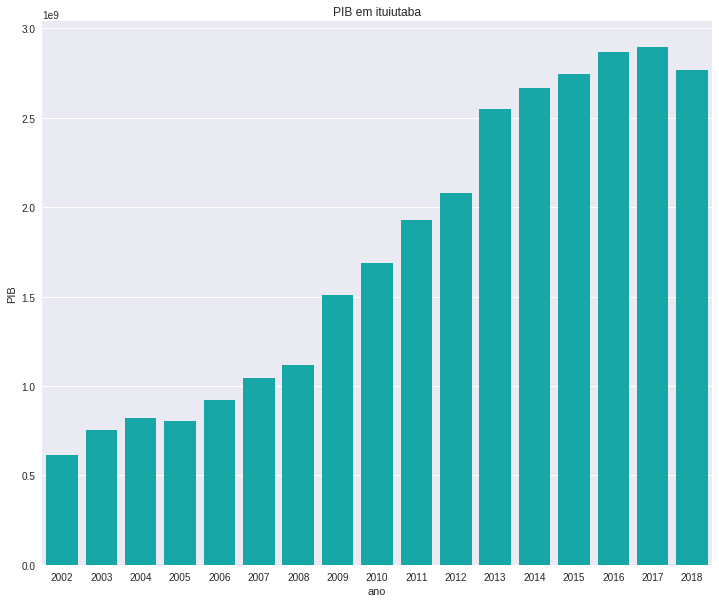

In [245]:
plt.style.use('seaborn')
#Largura e Altura em polegadas.
plt.figure(figsize=(12,10))
plt.title('PIB em ituiutaba')
sns.barplot(data = df_final[df_final['cidade'] == 'ituiutaba'], x = 'ano', y ='PIB', color = 'c')
plt.show()

Transformando o separador decimal dos campos numéricos novamente para "," para utilizar o Power BI futuramente

In [246]:
df_final['PIB(R$ 1000)'] = df_final['PIB(R$ 1000)'].astype(str)
df_final['PIB(R$ 1000)'] = [x.replace(".", ",") for x in df_final['PIB(R$ 1000)']]

df_final['desembolsos_reais'] = df_final['desembolsos_reais'].astype(str)
df_final['desembolsos_reais'] = [x.replace(".", ",") for x in df_final['desembolsos_reais']]

df_final['PIB'] = df_final['PIB'].astype(str)
df_final['PIB'] = [x.replace(".", ",") for x in df_final['PIB']]

df_final['% do Desembolso em relação ao PIB'] = df_final['% do Desembolso em relação ao PIB'].astype(str)
df_final['% do Desembolso em relação ao PIB'] = [x.replace(".", ",") for x in df_final['% do Desembolso em relação ao PIB']]

df_final['taxa_crescimento_PIB(%)'] = df_final['taxa_crescimento_PIB(%)'].astype(str)
df_final['taxa_crescimento_PIB(%)'] = [x.replace(".", ",") for x in df_final['taxa_crescimento_PIB(%)']]

df_final['taxa_crescimento_Desembolso(%)'] = df_final['taxa_crescimento_Desembolso(%)'].astype(str)
df_final['taxa_crescimento_Desembolso(%)'] = [x.replace(".", ",") for x in df_final['taxa_crescimento_Desembolso(%)']]


In [247]:
df_final['taxa_crescimento_PIB(%)'] = [x.replace("nan", "null") for x in df_final['taxa_crescimento_PIB(%)']]
df_final['taxa_crescimento_Desembolso(%)'] = [x.replace("nan", "null") for x in df_final['taxa_crescimento_Desembolso(%)']]

In [248]:
df_final

,codigo da regiao,Nome da Regiao de Planejamento,cidade,ano,Nome do Município,PIB(R$ 1000),desembolsos_reais,PIB,% do Desembolso em relação ao PIB,taxa_crescimento_PIB(%),taxa_crescimento_Desembolso(%)
0,5,Alto Paranaíba,abadia dos dourados,2002,Abadia dos Dourados,"23198,702","694576,5","23198702,0","0,029940317350513834",null,null
1,5,Alto Paranaíba,abadia dos dourados,2003,Abadia dos Dourados,"27629,635","933698,4500000001","27629635,0","0,033793368967776814","0,19099917745397985","0,34427014158987534"
2,5,Alto Paranaíba,abadia dos dourados,2004,Abadia dos Dourados,"31590,938","276940,45","31590938,0","0,008766452265519942","0,14337152843314796","-0,7033941204464889"
3,5,Alto Paranaíba,abadia dos dourados,2005,Abadia dos Dourados,"37311,984","1903000,8900000001","37311984,0","0,05100240421415275","0,18109769326887346","5,871516566106541"
4,5,Alto Paranaíba,abadia dos dourados,2006,Abadia dos Dourados,"41711,272","2970396,21","41711272,0","0,07121327323702811","0,11790549652894365","0,5609011144498203"
...,...,...,...,...,...,...,...,...,...,...,...
1117,4,Triângulo,verissimo,2014,Veríssimo,"99616,561","791040,2","99616561,0","0,007940850317047183","0,009403615406904573","-0,5935170549726113"
1118,4,Triângulo,verissimo,2015,Veríssimo,"94290,483","782200,0","94290483,0","0,008295641035161522","-0,05346578868547779","-0,011175411818514348"
1119,4,Triângulo,verissimo,2016,Veríssimo,"130883,596","437670,0","130883596,0","0,003343963746228366","0,3880891457518572","-0,4404627972385579"
1120,4,Triângulo,verissimo,2017,Veríssimo,"127936,119","660606,0","127936119,0","0,005163561355179142","-0,022519835105997536","0,5093700733429296"


Criando um arquivo no google sheets

In [249]:
!pip install --upgrade --quiet gspread
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

Criando

In [250]:
from gspread_dataframe import get_as_dataframe, set_with_dataframe
#brandname = 'PIBeDESEMBOLSO_ANUAL'

#sh = gc.create(brandname + '-subdirs_from_sitemap')
#worksheet = gc.open(brandname + '-subdirs_from_sitemap').sheet1

#set_with_dataframe(worksheet, df_final)

Atualizando - PIB e Desembolsos - Descomente para Atualizar

In [251]:
#sh1 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1zviZbSdEjSxnG3Uf-QRq-BR6G9ZELVJ-ZOd3sWrGQ9I/edit#gid=0')
#worksheet1 = sh1.get_worksheet(0)
#a1 = worksheet1.acell('A1').value

#set_with_dataframe(worksheet1, df_final)

#Construindo um DataFrame com todas as regiões para a comparação

In [252]:
df_desembolsos_gerais = df_desembolsos_mensais[['ano','setor_bndes','uf','desembolsos_reais','cidade']]

In [253]:
df_desembolsos_gerais

,ano,setor_bndes,uf,desembolsos_reais,cidade
0,2010,INDUSTRIA,RIO DE JANEIRO,24753538073.60,rio de janeiro
1,2009,INDUSTRIA,PERNAMBUCO,9889997969.99,ipojuca
2,2009,INDUSTRIA,RIO DE JANEIRO,9409998497.06,diversos
3,2012,COMÉRCIO E SERVIÇOS,DISTRITO FEDERAL,7271078745.30,diversos
4,2009,INFRAESTRUTURA,RIO DE JANEIRO,5699997243.57,diversos
...,...,...,...,...,...
3244799,2014,INDUSTRIA,SAO PAULO,1.00,sao joaquim da barra
3244800,2014,INFRAESTRUTURA,RIO GRANDE DO SUL,1.00,porto alegre
3244801,2020,AGROPECUÁRIA,PARANA,0.80,tijucas do sul
3244802,2016,COMÉRCIO E SERVIÇOS,PARANA,0.12,mangueirinha


In [254]:
df_desembolsos_gerais['uf'].value_counts()

SAO PAULO               669423
RIO GRANDE DO SUL       434850
PARANA                  400266
MINAS GERAIS            396461
SANTA CATARINA          308075
BAHIA                   135430
GOIAS                   117961
MATO GROSSO             109750
RIO DE JANEIRO          100432
ESPIRITO SANTO           78478
PERNAMBUCO               62532
MATO GROSSO DO SUL       61290
CEARA                    58493
PARA                     51168
MARANHAO                 42944
RONDONIA                 33847
TOCANTINS                29529
PARAIBA                  27417
RIO GRANDE DO NORTE      25975
PIAUI                    22451
AMAZONAS                 17441
ALAGOAS                  16984
SERGIPE                  15766
DISTRITO FEDERAL         12301
ACRE                      7163
AMAPA                     4891
RORAIMA                   3486
Name: uf, dtype: int64

In [255]:
df_regioes_TeAP

,codigo da regiao,Nome da Regiao de Planejamento,cidade
455,4,Triângulo,agua comprida
456,4,Triângulo,araguari
457,4,Triângulo,arapora
458,4,Triângulo,cachoeira dourada
459,4,Triângulo,campina verde
...,...,...,...
516,5,Alto Paranaíba,santa rosa da serra
517,5,Alto Paranaíba,sao gotardo
518,5,Alto Paranaíba,serra do salitre
519,5,Alto Paranaíba,tapira


In [256]:
df_desembolsos_gerais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244804 entries, 0 to 3244803
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ano                int64  
 1   setor_bndes        object 
 2   uf                 object 
 3   desembolsos_reais  float64
 4   cidade             object 
dtypes: float64(1), int64(1), object(3)
memory usage: 123.8+ MB


In [257]:
#Tratando e uniformizando o nome dos estados
estados = df_desembolsos_gerais['uf']
r = re.compile(r'[^\D]*|[\/]*')
es=[]
for i in estados: 
  aux1 = i.lower()
  aux2 = unidecode(aux1)
  aux3 = aux2.rstrip()
  es.append(r.sub('', aux3))

df_desembolsos_gerais.insert(5,'Estado',es)

In [258]:
#Criando duas colunas de região para todo os dados 
cidades_triangulo = df_regioes_TeAP['cidade'][df_regioes_TeAP['codigo da regiao'] == 4]
cidades_Alto = df_regioes_TeAP['cidade'][df_regioes_TeAP['codigo da regiao'] == 5]
cidades_gerais = df_desembolsos_gerais['cidade']
estado = df_desembolsos_gerais['Estado']


regiao = []
codigo = []
cont = 0
for c in cidades_gerais:
  if ((c in cidades_triangulo.values) & (estado[cont] == 'minas gerais')):
    regiao.append("Triângulo")
    codigo.append(4)
  elif ((c in cidades_Alto.values) & (estado[cont] == 'minas gerais')):
    regiao.append("Alto Paranaíba")
    codigo.append(5)
  else:
    regiao.append("Outras")
    codigo.append(1)
  cont = cont + 1

df_desembolsos_gerais.insert(6, 'Nome da Regiao de Planejamento', regiao)
df_desembolsos_gerais.insert(7, 'codigo da regiao', codigo)

In [259]:
df_desembolsos_gerais[df_desembolsos_gerais['cidade'] == 'prata']

,ano,setor_bndes,uf,desembolsos_reais,cidade,Estado,Nome da Regiao de Planejamento,codigo da regiao
27202,2017,INDUSTRIA,MINAS GERAIS,7000000.00,prata,minas gerais,Triângulo,4
30636,2013,INDUSTRIA,MINAS GERAIS,6000000.00,prata,minas gerais,Triângulo,4
35539,2016,INDUSTRIA,MINAS GERAIS,5069668.33,prata,minas gerais,Triângulo,4
36175,2017,INDUSTRIA,MINAS GERAIS,5000000.00,prata,minas gerais,Triângulo,4
36655,2019,INDUSTRIA,MINAS GERAIS,5000000.00,prata,minas gerais,Triângulo,4
...,...,...,...,...,...,...,...,...
3233481,2012,INDUSTRIA,MINAS GERAIS,617.29,prata,minas gerais,Triângulo,4
3239562,2012,INDUSTRIA,MINAS GERAIS,398.06,prata,minas gerais,Triângulo,4
3240472,2010,COMÉRCIO E SERVIÇOS,PARAIBA,350.79,prata,paraiba,Outras,1
3242892,2015,COMÉRCIO E SERVIÇOS,MINAS GERAIS,222.62,prata,minas gerais,Triângulo,4


In [260]:
df_desembolsos_gerais[(df_desembolsos_gerais['codigo da regiao'] == 4) | (df_desembolsos_gerais['codigo da regiao'] == 5)]

,ano,setor_bndes,uf,desembolsos_reais,cidade,Estado,Nome da Regiao de Planejamento,codigo da regiao
973,1999,INFRAESTRUTURA,MINAS GERAIS,200000000.00,uberlandia,minas gerais,Triângulo,4
1024,2019,INFRAESTRUTURA,MINAS GERAIS,196783000.00,guimarania,minas gerais,Alto Paranaíba,5
1843,2004,INFRAESTRUTURA,MINAS GERAIS,122924928.84,arapora,minas gerais,Triângulo,4
2126,2013,INDUSTRIA,MINAS GERAIS,107963767.94,santa vitoria,minas gerais,Triângulo,4
2599,2016,INFRAESTRUTURA,MINAS GERAIS,92730379.16,santa vitoria,minas gerais,Triângulo,4
...,...,...,...,...,...,...,...,...
3244627,2009,INDUSTRIA,MINAS GERAIS,59.70,frutal,minas gerais,Triângulo,4
3244657,2010,INDUSTRIA,MINAS GERAIS,50.00,uberlandia,minas gerais,Triângulo,4
3244706,2011,INFRAESTRUTURA,MINAS GERAIS,37.61,sacramento,minas gerais,Alto Paranaíba,5
3244740,2012,COMÉRCIO E SERVIÇOS,MINAS GERAIS,30.02,conceicao das alagoas,minas gerais,Triângulo,4


Transformando novamente o separador decimal dos campos numéricos para "," para utilizar o Power BI futuramente

In [261]:
df_desembolsos_gerais['desembolsos_reais'] = df_desembolsos_gerais['desembolsos_reais'].astype(str)
df_desembolsos_gerais['desembolsos_reais'] = [x.replace(".",",") for x in df_desembolsos_gerais['desembolsos_reais']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [262]:
df_desembolsos_gerais

,ano,setor_bndes,uf,desembolsos_reais,cidade,Estado,Nome da Regiao de Planejamento,codigo da regiao
0,2010,INDUSTRIA,RIO DE JANEIRO,"24753538073,6",rio de janeiro,rio de janeiro,Outras,1
1,2009,INDUSTRIA,PERNAMBUCO,"9889997969,99",ipojuca,pernambuco,Outras,1
2,2009,INDUSTRIA,RIO DE JANEIRO,"9409998497,06",diversos,rio de janeiro,Outras,1
3,2012,COMÉRCIO E SERVIÇOS,DISTRITO FEDERAL,"7271078745,3",diversos,distrito federal,Outras,1
4,2009,INFRAESTRUTURA,RIO DE JANEIRO,"5699997243,57",diversos,rio de janeiro,Outras,1
...,...,...,...,...,...,...,...,...
3244799,2014,INDUSTRIA,SAO PAULO,"1,0",sao joaquim da barra,sao paulo,Outras,1
3244800,2014,INFRAESTRUTURA,RIO GRANDE DO SUL,"1,0",porto alegre,rio grande do sul,Outras,1
3244801,2020,AGROPECUÁRIA,PARANA,"0,8",tijucas do sul,parana,Outras,1
3244802,2016,COMÉRCIO E SERVIÇOS,PARANA,"0,12",mangueirinha,parana,Outras,1


Extraindo apenas de 2002 até 2018

In [263]:
df_desembolsos_gerais = df_desembolsos_gerais[(df_desembolsos_gerais['ano'] >= 2002) & (df_desembolsos_gerais['ano'] <= 2018)]

In [264]:
df_desembolsos_gerais

,ano,setor_bndes,uf,desembolsos_reais,cidade,Estado,Nome da Regiao de Planejamento,codigo da regiao
0,2010,INDUSTRIA,RIO DE JANEIRO,"24753538073,6",rio de janeiro,rio de janeiro,Outras,1
1,2009,INDUSTRIA,PERNAMBUCO,"9889997969,99",ipojuca,pernambuco,Outras,1
2,2009,INDUSTRIA,RIO DE JANEIRO,"9409998497,06",diversos,rio de janeiro,Outras,1
3,2012,COMÉRCIO E SERVIÇOS,DISTRITO FEDERAL,"7271078745,3",diversos,distrito federal,Outras,1
4,2009,INFRAESTRUTURA,RIO DE JANEIRO,"5699997243,57",diversos,rio de janeiro,Outras,1
...,...,...,...,...,...,...,...,...
3244798,2017,AGROPECUÁRIA,SANTA CATARINA,"1,62",agua doce,santa catarina,Outras,1
3244799,2014,INDUSTRIA,SAO PAULO,"1,0",sao joaquim da barra,sao paulo,Outras,1
3244800,2014,INFRAESTRUTURA,RIO GRANDE DO SUL,"1,0",porto alegre,rio grande do sul,Outras,1
3244802,2016,COMÉRCIO E SERVIÇOS,PARANA,"0,12",mangueirinha,parana,Outras,1


Criando o csv do arquivo dos desembolsos, pois o google sheets não suporta o tamanho. Descomente para criar novamente.

In [265]:
#df_desembolsos_gerais.to_csv(r'/content/drive/MyDrive/desafio bndes/maratona - sites e bases de dados utilizadas/desembolsos_regioesf.csv', sep='\t', encoding='utf-8', index=False, header=True)

#Validando a relação entre PIB e desembolsos do BNDES

In [266]:
df_final.head(1)

,codigo da regiao,Nome da Regiao de Planejamento,cidade,ano,Nome do Município,PIB(R$ 1000),desembolsos_reais,PIB,% do Desembolso em relação ao PIB,taxa_crescimento_PIB(%),taxa_crescimento_Desembolso(%)
0,5,Alto Paranaíba,abadia dos dourados,2002,Abadia dos Dourados,"23198,702","694576,5","23198702,0","0,029940317350513834",null,null


Transfomando os dados novamente para a análise

In [267]:
dfs = df_final[['codigo da regiao','Nome da Regiao de Planejamento', 'cidade', 'ano', 'Nome do Município','PIB(R$ 1000)', 'desembolsos_reais', 'PIB']]

dfs['PIB(R$ 1000)'] = [x.replace(",", ".") for x in dfs['PIB(R$ 1000)']]
dfs['PIB(R$ 1000)'] = dfs['PIB(R$ 1000)'].astype(float)

dfs['desembolsos_reais'] = [x.replace(",", ".") for x in dfs['desembolsos_reais']]
dfs['desembolsos_reais'] = dfs['desembolsos_reais'].astype(float)

dfs['PIB'] = [x.replace(",", ".") for x in dfs['PIB']]
dfs['PIB'] = dfs['PIB'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [268]:
dfs

,codigo da regiao,Nome da Regiao de Planejamento,cidade,ano,Nome do Município,PIB(R$ 1000),desembolsos_reais,PIB
0,5,Alto Paranaíba,abadia dos dourados,2002,Abadia dos Dourados,23198.70,694576.50,23198702.00
1,5,Alto Paranaíba,abadia dos dourados,2003,Abadia dos Dourados,27629.63,933698.45,27629635.00
2,5,Alto Paranaíba,abadia dos dourados,2004,Abadia dos Dourados,31590.94,276940.45,31590938.00
3,5,Alto Paranaíba,abadia dos dourados,2005,Abadia dos Dourados,37311.98,1903000.89,37311984.00
4,5,Alto Paranaíba,abadia dos dourados,2006,Abadia dos Dourados,41711.27,2970396.21,41711272.00
...,...,...,...,...,...,...,...,...
1117,4,Triângulo,verissimo,2014,Veríssimo,99616.56,791040.20,99616561.00
1118,4,Triângulo,verissimo,2015,Veríssimo,94290.48,782200.00,94290483.00
1119,4,Triângulo,verissimo,2016,Veríssimo,130883.60,437670.00,130883596.00
1120,4,Triângulo,verissimo,2017,Veríssimo,127936.12,660606.00,127936119.00


In [269]:
dfs = pd.read_excel("/content/drive/MyDrive/desafio bndes/maratona - sites e bases de dados utilizadas/Pib_e_Desembolsos_T.xlsx", sheet_name="Folha1")
print(dfs.head(10))

   codigo da regiao  ... taxa_crescimento_Desembolso(%)
0                 5  ...                            nan
1                 5  ...                           0.34
2                 5  ...                          -0.70
3                 5  ...                           5.87
4                 5  ...                           0.56
5                 5  ...                          -0.40
6                 5  ...                           0.25
7                 5  ...                           0.75
8                 5  ...                           1.29
9                 5  ...                          -0.49

[10 rows x 13 columns]


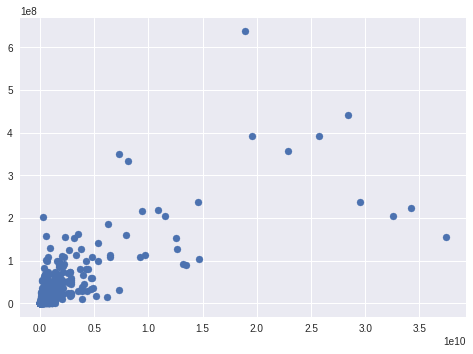

In [270]:
x = dfs['PIB']
y = dfs['desembolsos_reais']
plt.scatter(x,y)

A função estatística f_oneway recebe as variáveis (colunas do df) como entrada e retorna ANOVA F e o valor p.

In [271]:
fvalue, pvalue = stats.f_oneway(dfs['PIB'],dfs['desembolsos_reais'])
print(f'Teste ANOVA:   fvalue = {fvalue},    pvalue = {pvalue}')

Teste ANOVA:   fvalue = 90.70237318698574,    pvalue = 4.161423071123066e-21


In [272]:
print("Estatísticas descritivas de y:")
y.describe()

Estatísticas descritivas de y:


count        1122.00
mean     16810555.56
std      43854735.10
min             0.10
25%       1369473.88
50%       4096574.77
75%      12831606.96
max     637256938.32
Name: desembolsos_reais, dtype: float64

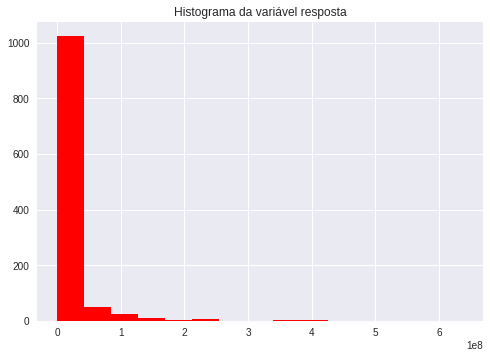

In [273]:
plt.hist(y, color='red', bins=15)
plt.title('Histograma da variável resposta')
plt.show()

A regressão linear não se aplica porque os dados não seguem uma distribuição normal.

Teste de Shapiro-Wilk - Hipótese nula : os dados são extraídos da distribuição normal

In [274]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.35299962759017944 0.0


# Regressão Logística

In [275]:
dfs.head(1)

,codigo da regiao,Nome da Regiao de Planejamento,cidade,ano,Nome do Município,PIB(R$ 1000),desembolsos_reais,Var_Desmb_BNDES,PIB,Var_PIB,% do Desembolso em relação ao PIB,taxa_crescimento_PIB(%),taxa_crescimento_Desembolso(%)
0,5,Alto Paranaíba,abadia dos dourados,2002,Abadia dos Dourados,23198.70,694576.50,694576.50,23198702.00,23198702.00,0.03,nan,nan


Y = alfa + beta1 * x1 + beta2 * x2 + .... 

ln(Y) = ....

In [276]:
y,alfa = stats.boxcox(dfs['PIB'])
print(f'Alfa (box-cox):   {alfa}')
dfs['box_cox'] = y

Alfa (box-cox):   -0.11835367271691656


In [277]:
fvalue, pvalue = stats.f_oneway(y,dfs['desembolsos_reais'])
print(f'Teste ANOVA:   fvalue = {fvalue},    pvalue = {pvalue}')

Teste ANOVA:   fvalue = 164.86315795020258,    pvalue = 1.8265974816958093e-36


In [278]:
print("Estatísticas descritivas de y transformado:")
dfs['box_cox'].describe()

Estatísticas descritivas de y transformado:


count   1122.00
mean       7.57
std        0.15
min        7.13
25%        7.46
50%        7.57
75%        7.66
max        7.98
Name: box_cox, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f1dd3f50990>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1dd3bf82d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1dd3cfc890>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1dd3ee4fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1dd3f45fd0>,
  <matplotlib.lines.Line2D at 0x7f1dd3f45890>]}

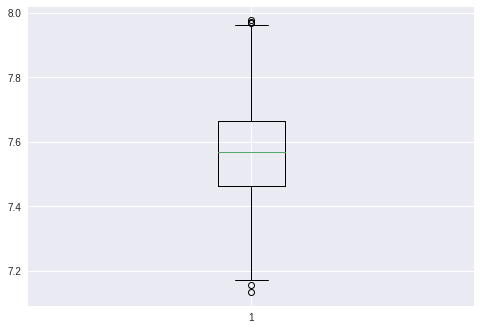

In [279]:
plt.boxplot(y)

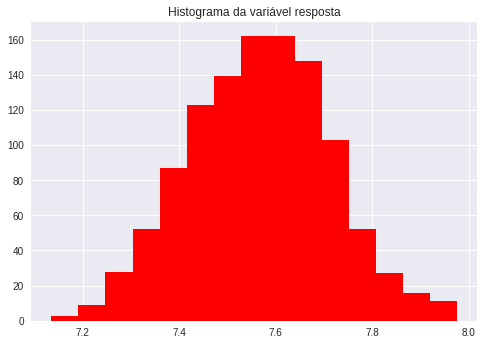

In [280]:
plt.hist(y, color='red', bins=15)
plt.title('Histograma da variável resposta')
plt.show()

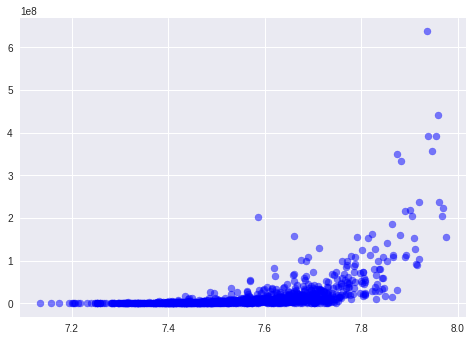

In [281]:
plt.scatter(y, dfs['desembolsos_reais'], color='blue', s=50, alpha=.5)
plt.show()

In [282]:
reg = ols(formula='box_cox ~ desembolsos_reais', data=dfs).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                box_cox   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     422.9
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           5.67e-80
Time:                        01:11:22   Log-Likelihood:                 741.39
No. Observations:                1122   AIC:                            -1479.
Df Residuals:                    1120   BIC:                            -1469.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.5363      0.00

O R2 ajustado nos dá uma medida de porcentagem da variância explicada pelo modelo. Este modelo tem um poder explicativo de 27.3% - apenas nos diz o quanto de nossos dados esse modelo explica. O restante do que falta explicar é atribuído ao termo do erro, ou seja, todas as outras coisas que tem influência sobre nossa variável resposta mas que não estão no modelo ou não podem de alguma forma ser mensuradas.

A estatística de teste F e seu p-valor < 0.001 (5.67e-80) basicamente nos mostram que esse modelo é estatisticamente válido.

Coeficientes da regressão:

Intercept 7.5363

desembolsos_reais 1.752e-09

O p-valor para o coeficiente Beta1 estimado é menor que 0.001 (0.000) o que mostra que ele é estatisticamente significativo - Quando analisamos o "p-valor" observamos que ele está bem baixo, algo bem próximo à zero foi encoberto pelo arredondamento, isso nos faz rejeitar a hipótese nula.

Modelo:

In [283]:
print(f'Intercepto: {reg.params[0]}        Beta1: {reg.params[1]}')

Intercepto: 7.536274493712404        Beta1: 1.751728322247141e-09


In [284]:
print(f'Parâmetro alfa:    {alfa}')

Parâmetro alfa:    -0.11835367271691656


Definição da função inversa da Box_Cox

In [285]:
def invboxcox(y,ld):
   if ld == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(ld*y+1)/ld))

Cálculo do Y estimado

In [286]:
YhatBC = 7.5363 + 1.752e-09 * dfs['desembolsos_reais'] 

In [287]:
Yhat=[]
for i in YhatBC:
   aux = invboxcox(i,-0.11835367271691656 )
   Yhat.append(aux)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [288]:
#Previsão de retorno do investimento do BNDES em Crescimento do PIB
X =  input('Digite o valor a ser investido: ')
Y = 7.5363 + 1.752e-09 * float(X) 
print(f"Esse investimento deverá trazer um crescimento no PIB de:   {invboxcox(Y,alfa)}")

Digite o valor a ser investido: 1000000
Esse investimento deverá trazer um crescimento no PIB de:   148646650.49341044


In [289]:
dfs.PIB

0       23198702.00
1       27629635.00
2       31590938.00
3       37311984.00
4       41711272.00
           ...     
1117    99616561.00
1118    94290483.00
1119   130883596.00
1120   127936119.00
1121   113015151.00
Name: PIB, Length: 1122, dtype: float64

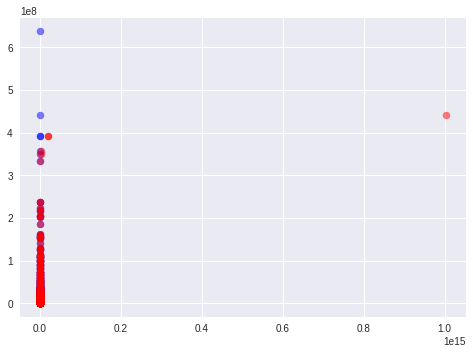

In [290]:
plt.scatter(y, dfs['desembolsos_reais'], color='blue', s=50, alpha=.5)
plt.scatter(Yhat, dfs['desembolsos_reais'], color='red', s=50, alpha=.5)
plt.show()

Dashboard disponível em: https://app.powerbi.com/view?r=eyJrIjoiY2QyYTZjNjYtYzU4MS00YzQ2LTllY2EtZGZmMTUyYjgxZDNkIiwidCI6IjQwZDZmOWI4LWVjYTctNDZhMi05MmQ0LWVhNGU5YzAxNzBlMSIsImMiOjR9 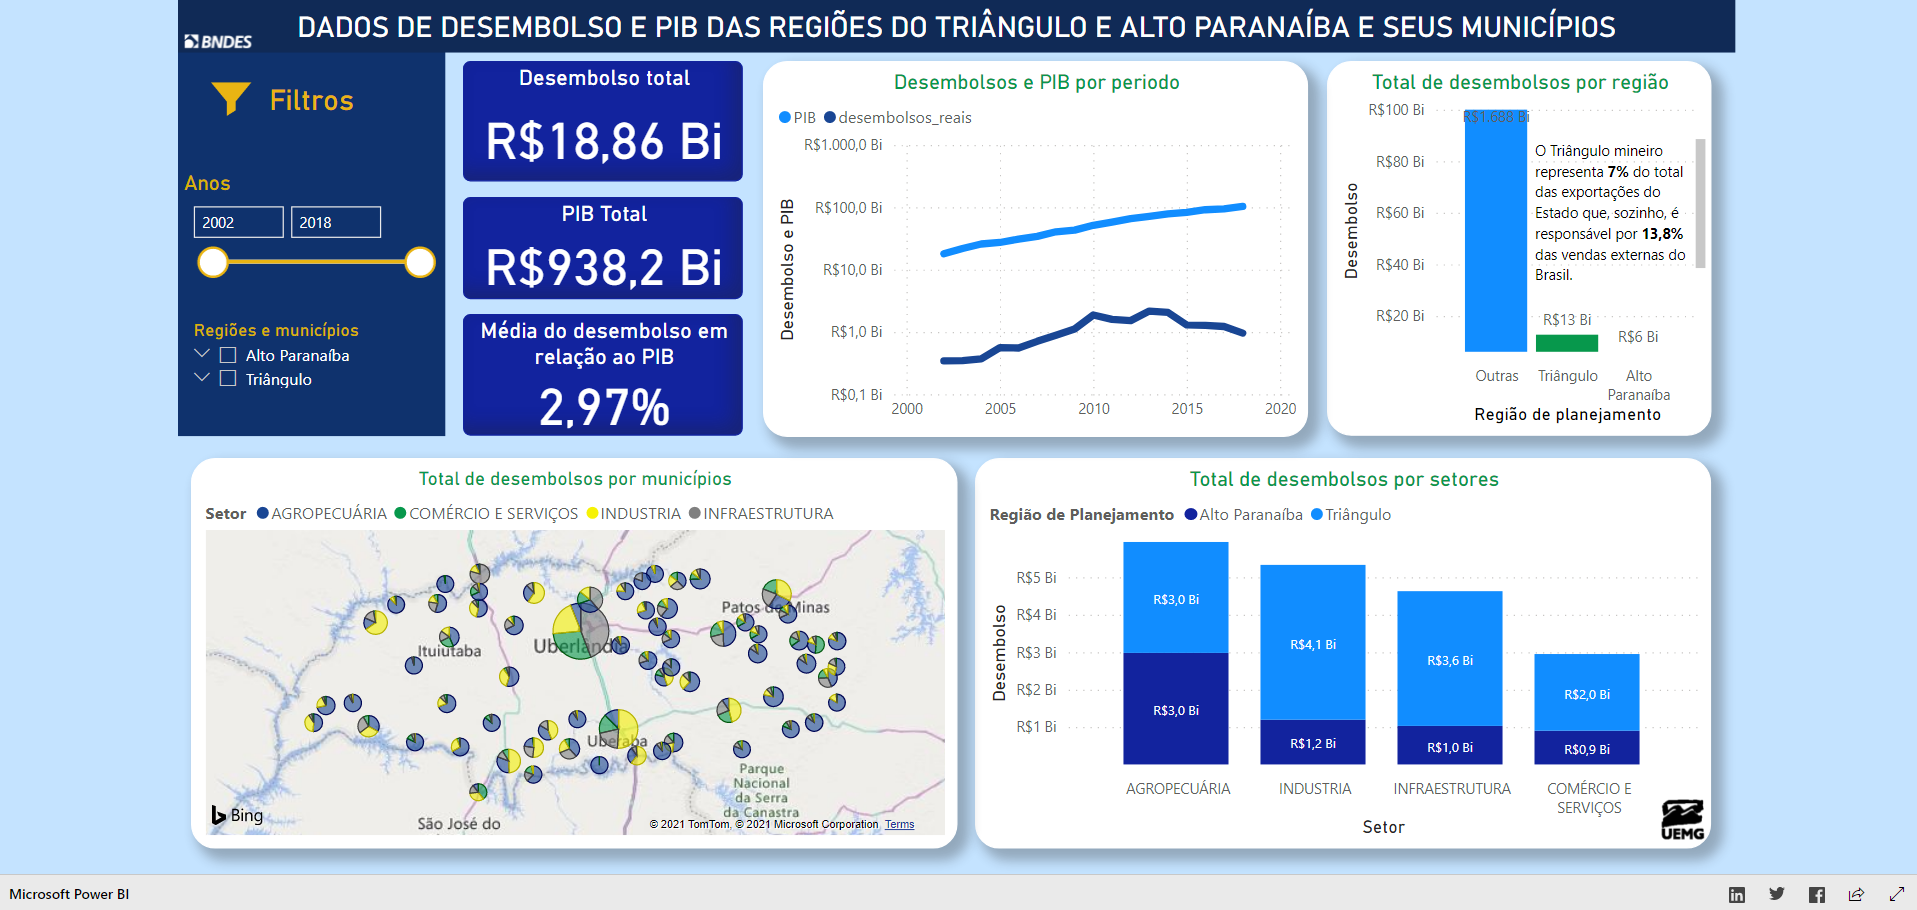